In [2]:
# 1. 导入依赖
import pandas as pd
import numpy as np
import sys
sys.path.append('../src')
from viz_utils import plot_heatmap, plot_group_bar
from stats_utils import t_test
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
matplotlib.rcParams['axes.unicode_minus'] = False    # 正确显示负号


In [4]:
# 2. 读取数据
df = pd.read_csv('../data/processed/merged_data.csv')
df.head()

,title,play_count,date,duration,tname,tname_v2,view,reply,favorite,coin,share,like,dislike,tags,duration_seconds
0,我们最早去探明日方舟联名店但是最晚发…,581000.0,2025-5-5,13:31,搞笑,二次元线下,581916,1068,6238,10496,6399,44425,0,明日方舟 名创优品 联动,811
1,我们从网上找来了一些有趣网站…,822000.0,2025-5-3,23:08,搞笑,随拍·综合,822231,1031,15459,29698,2448,63762,0,解锁一个新兴趣 有趣 搞笑 娱乐 吐槽 电脑 把兴趣玩出名堂 互联网 网站,1388
2,谢谢你影石insta360 X5 全景相机让我们又有理由出去玩了…,307000.0,2025-5-1,15:56,搞笑,摄影摄像,307463,485,2369,5575,580,17513,0,拍照设备 影石X5 运动相机,956
3,就是因为你才没刮胡子么飞科？,486000.0,2025-4-28,03:25,搞笑,家用电器,486010,724,2034,4311,348,28489,0,飞科f8 飞科f8剃须刀 飞科f8往复式便携剃须刀,205
4,又网买玩...,1077000.0,2025-4-25,41:52,搞笑,潮玩玩具,1077579,2029,10178,25748,1938,55510,0,开箱,2512


In [6]:
# 3. 计算互动率
df['like_rate'] = df['like'] / df['view'].replace(0, np.nan)
df['favorite_rate'] = df['favorite'] / df['view'].replace(0, np.nan)
df['coin_rate'] = df['coin'] / df['view'].replace(0, np.nan)
df['share_rate'] = df['share'] / df['view'].replace(0, np.nan)
df['reply_rate'] = df['reply'] / df['view'].replace(0, np.nan)
df['all_interact_rate'] = (df['like'] + df['favorite'] + df['coin'] + df['share'] + df['reply']) / df['view'].replace(0, np.nan)
df[['like_rate', 'favorite_rate', 'coin_rate', 'share_rate', 'reply_rate', 'all_interact_rate']].describe()


,like_rate,favorite_rate,coin_rate,share_rate,reply_rate,all_interact_rate
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.051181,0.005631,0.016343,0.002865,0.001498,0.077518
std,0.014706,0.004094,0.014223,0.002605,0.001606,0.031945
min,0.021996,0.001258,0.002221,0.000206,0.000200,0.028997
25%,0.039257,0.003120,0.008151,0.001236,0.000788,0.054756
50%,0.051404,0.004596,0.012072,0.002062,0.001151,0.074032
75%,0.060278,0.006966,0.019792,0.003500,0.001720,0.091304
max,0.110510,0.045035,0.149473,0.020692,0.017884,0.302805


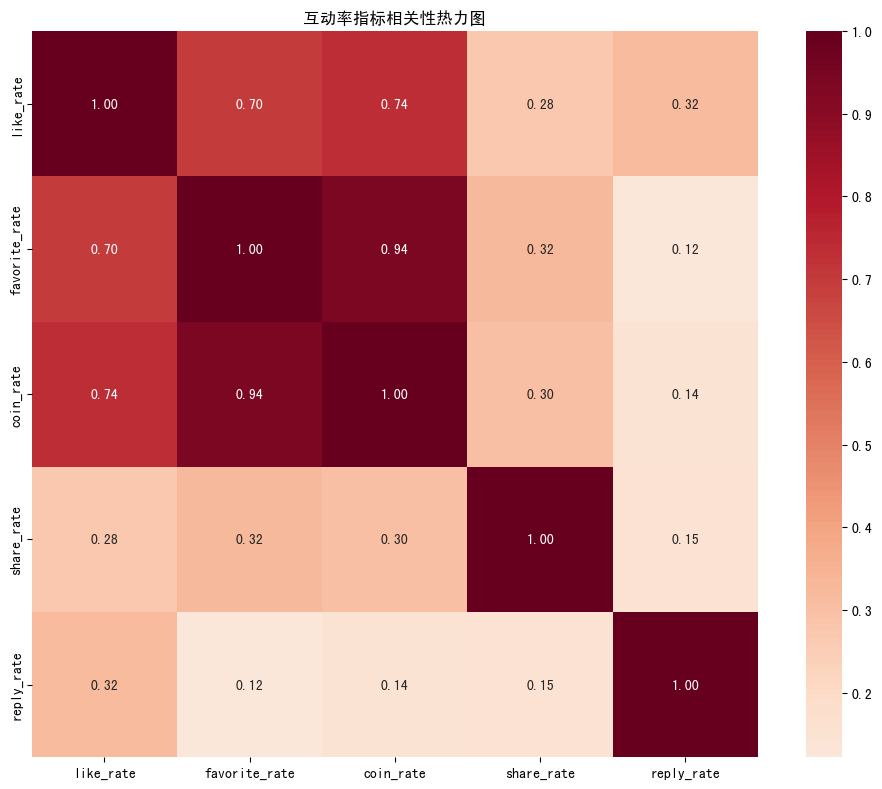

In [8]:
# 4. 互动率相关性热力图
interact_cols = ['like_rate', 'favorite_rate', 'coin_rate', 'share_rate', 'reply_rate']
plot_heatmap(df, interact_cols, title='互动率指标相关性热力图')


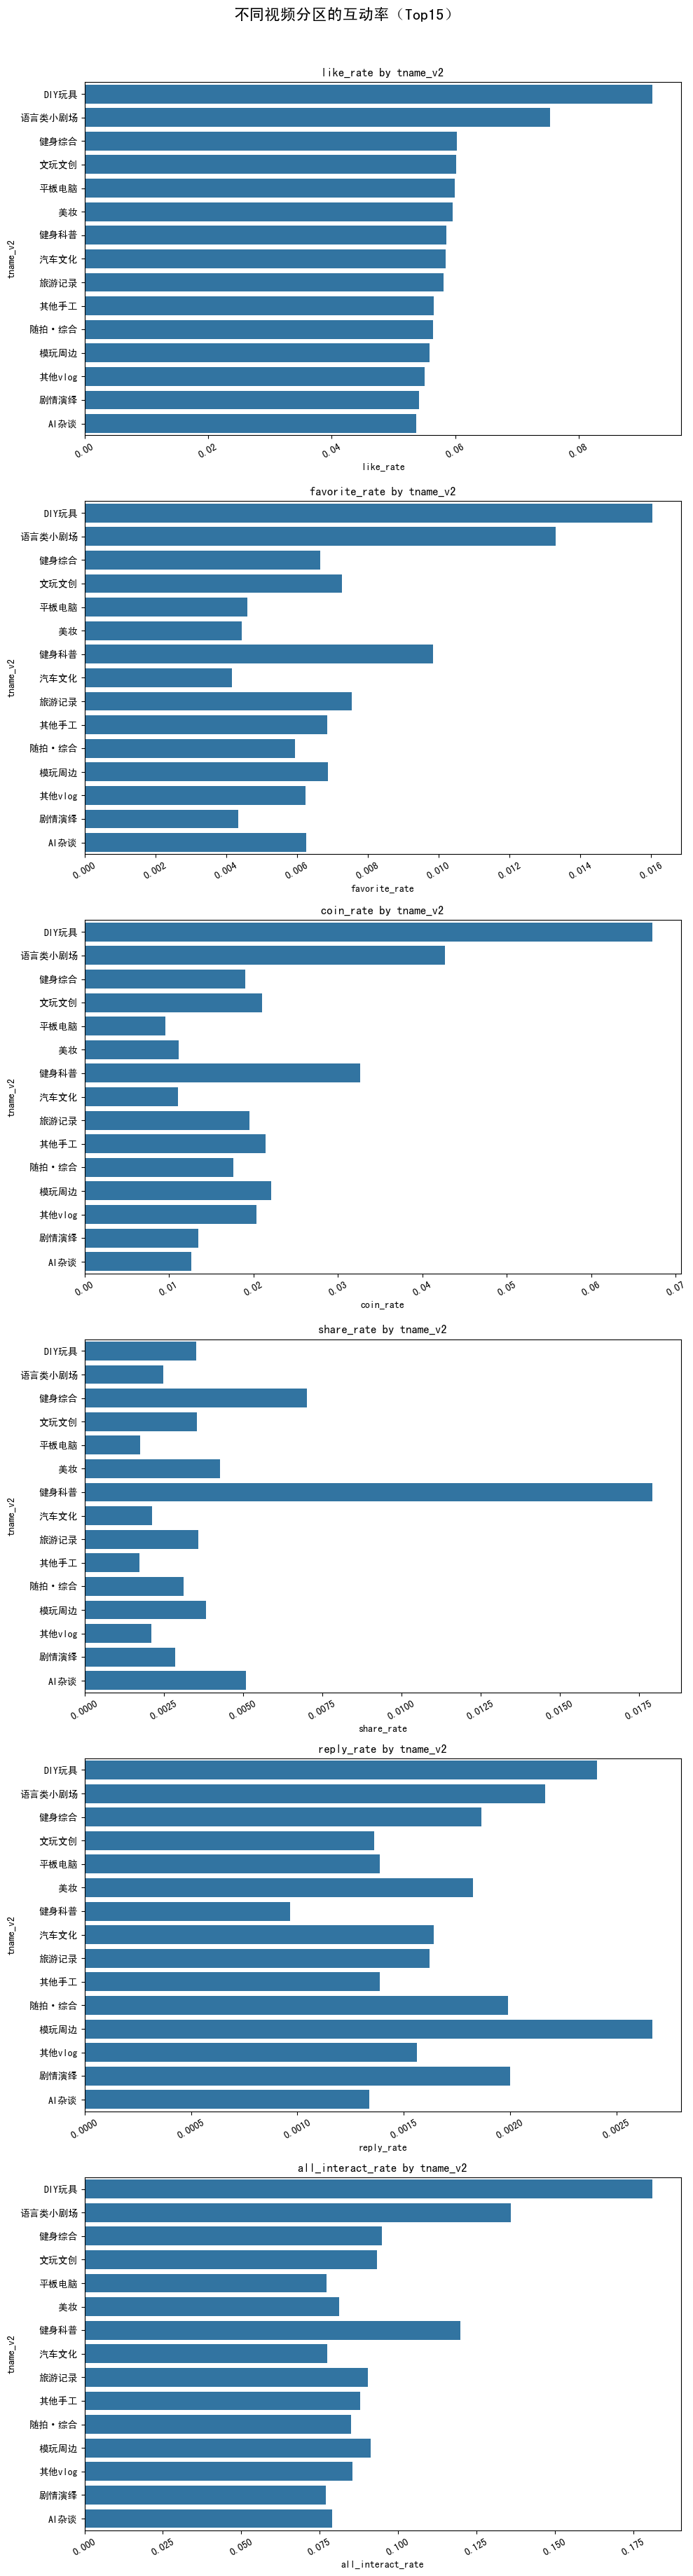

In [10]:
# 5. 不同分区的互动率对比
group_cols = ['like_rate', 'favorite_rate', 'coin_rate', 'share_rate', 'reply_rate', 'all_interact_rate']
plot_group_bar(
    df, 
    'tname_v2', 
    group_cols, 
    title='不同视频分区的互动率（Top15）', 
    ylabel='分区', 
    top_n=15, 
    horizontal=True, 
    facet=True
)


In [12]:
# 6. 各分区互动率是否显著高于全局平均水平
from scipy.stats import ttest_1samp
summary = []
for name, sub in df.groupby('tname_v2'):
    row = {'tname_v2': name}
    for col in ['like_rate', 'favorite_rate', 'coin_rate', 'share_rate', 'reply_rate', 'all_interact_rate']:
        global_mean = df[col].mean()
        t_stat, p_value = ttest_1samp(sub[col].dropna(), global_mean, nan_policy='omit')
        row[col+'_p'] = p_value
        row[col+'_higher'] = (sub[col].mean() > global_mean) and (p_value < 0.05)
    summary.append(row)
pd.DataFrame(summary)


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


,tname_v2,like_rate_p,like_rate_higher,favorite_rate_p,favorite_rate_higher,coin_rate_p,coin_rate_higher,share_rate_p,share_rate_higher,reply_rate_p,reply_rate_higher,all_interact_rate_p,all_interact_rate_higher
0,AI学习,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False
1,AI影视,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False
2,AI杂谈,0.703749,False,0.770301,False,0.583702,False,0.583411,False,0.652396,False,0.938409,False
3,DIY玩具,0.115525,False,0.318338,False,0.187509,False,0.580768,False,0.174700,False,0.177803,False
4,SLG游戏,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,随拍·综合,0.015657,True,0.635811,False,0.565797,False,0.593641,False,0.039779,True,0.111862,False
61,非二次元绘画,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False
62,鞋服穿搭,0.595788,False,0.311272,False,0.016793,False,0.056790,False,0.508555,False,0.330946,False
63,音乐综合,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False


In [14]:
# 7. 关键词组互动率对比
keywords = ['开箱', '测评', '教程', '记录', '吐槽']
results = []
for kw in keywords:
    mask = df['title'].str.contains(kw)
    if mask.sum() > 0:  # 只分析有数据的关键词
        row = {'keyword': kw, 'count': mask.sum()}
        for col in ['like_rate', 'favorite_rate', 'coin_rate', 'share_rate', 'reply_rate', 'all_interact_rate']:
            row[col] = df.loc[mask, col].mean()
        results.append(row)
result_df = pd.DataFrame(results)
result_df

,keyword,count,like_rate,favorite_rate,coin_rate,share_rate,reply_rate,all_interact_rate
0,开箱,17,0.053400,0.005837,0.017410,0.002414,0.001286,0.080347
1,教程,1,0.027332,0.002484,0.005200,0.002924,0.001420,0.039361
2,记录,1,0.048208,0.005298,0.009119,0.000583,0.000826,0.064033
3,吐槽,1,0.034376,0.003769,0.011012,0.005490,0.001445,0.056091


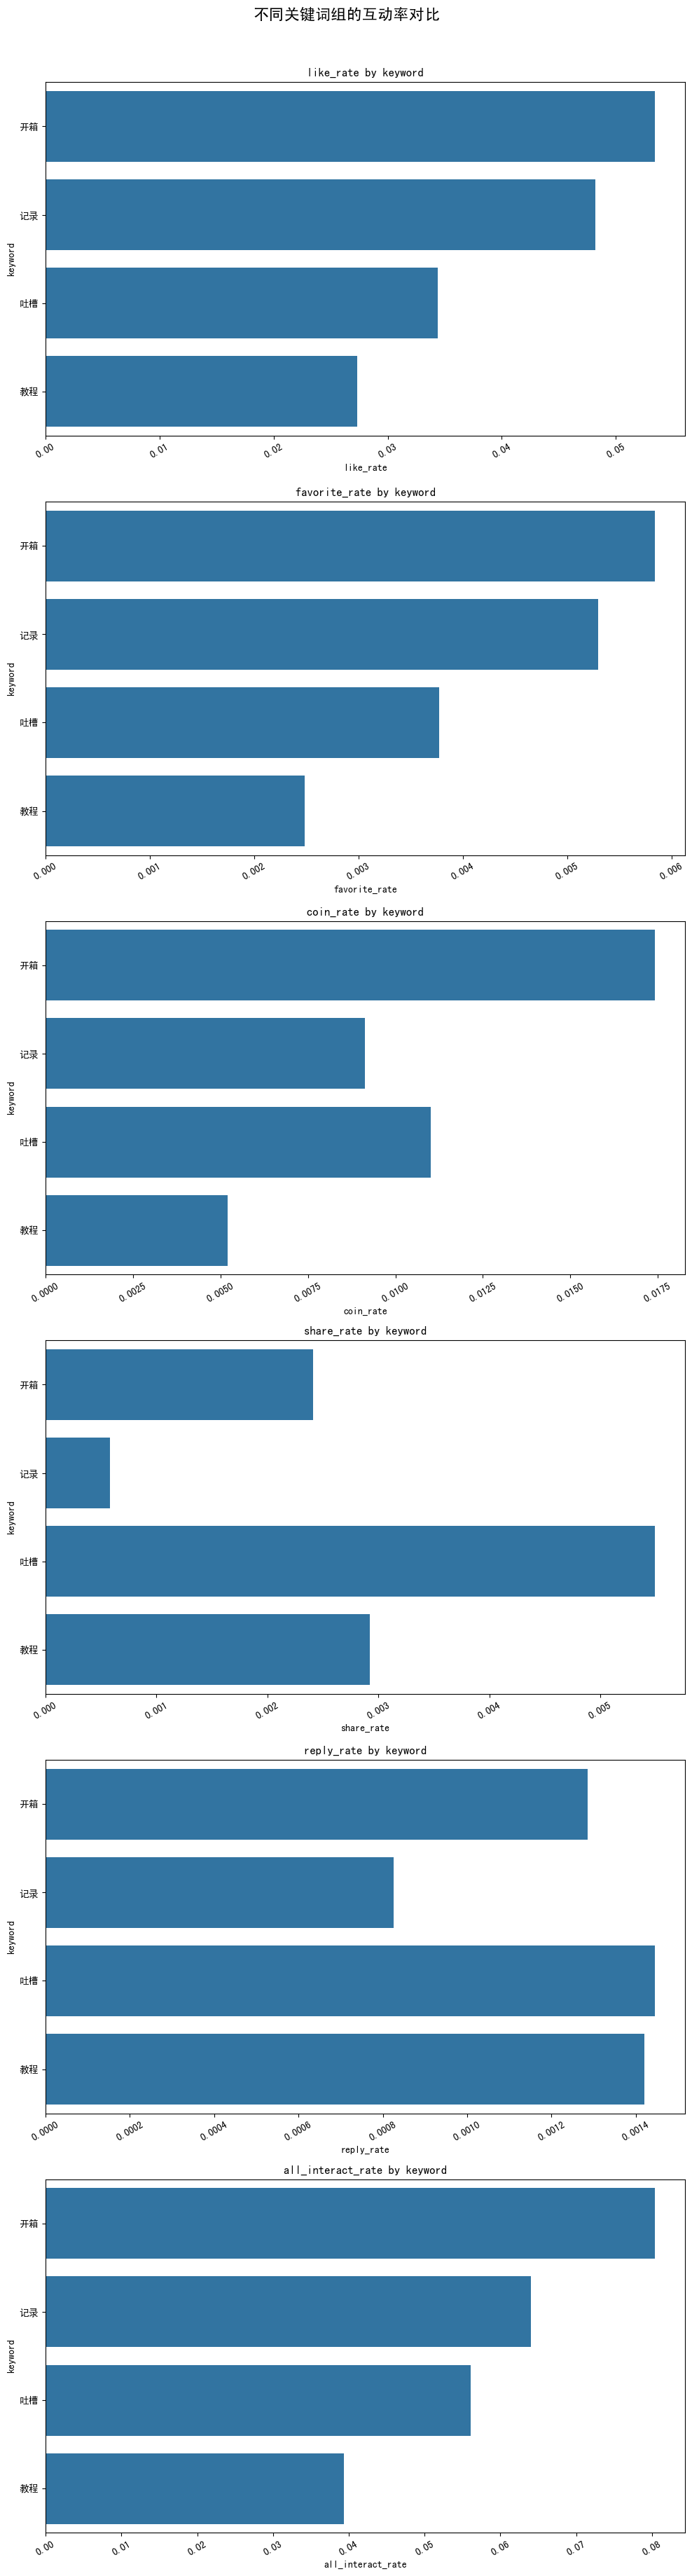

In [16]:
# 8. 关键词组互动率可视化
if not result_df.empty:
    plot_group_bar(
        result_df, 
        'keyword', 
        ['like_rate', 'favorite_rate', 'coin_rate', 'share_rate', 'reply_rate', 'all_interact_rate'], 
        title='不同关键词组的互动率对比', 
        ylabel='关键词', 
        horizontal=True, 
        facet=True
    )